In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Category 0
df0 =pd.read_csv(r'/gdrive/Shareddrives/FYP Project/Dataset_October25_Clustering/FoodData_group0.csv')
# Category 1
df1 =pd.read_csv(r'/gdrive/Shareddrives/FYP Project/Dataset_October25_Clustering/FoodData_group1.csv')
# Category 2
df2 =pd.read_csv(r'/gdrive/Shareddrives/FYP Project/Dataset_October25_Clustering/FoodData_group2.csv')
# Category 3
df3 =pd.read_csv(r'/gdrive/Shareddrives/FYP Project/Dataset_October25_Clustering/FoodData_group3.csv')


In [5]:
# Combine all categories
df_all = pd.concat([df0, df1, df2, df3])

In [6]:
df_all.describe()

,Unnamed: 0,GI,Calories (kcal),Protein (g),Fats (g),Carbs (g),Fiber (g),Sugar (g),Phosphorus (mg),Potassium (mg),Sodium (mg),Saturated Fat (g),Trans Fat (g),Category
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.00000,550.000000,550.000000,550.000000,550.000000
mean,274.500000,0.307273,222.280000,8.440164,11.159473,22.772273,2.990545,7.148927,144.378182,299.46000,370.740000,3.628436,0.072564,1.834545
std,158.915596,0.589944,190.432003,9.259922,19.529972,25.272725,6.369072,15.503984,179.487143,356.45396,2055.078385,7.626343,0.676744,1.116154
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,137.250000,0.000000,66.250000,1.202500,0.300000,3.335000,0.000000,0.000000,25.250000,112.00000,5.000000,0.040000,0.000000,1.000000
50%,274.500000,0.000000,174.000000,4.510000,2.325000,12.865000,1.100000,1.045000,94.500000,203.00000,44.000000,0.525000,0.000000,2.000000
75%,411.750000,0.000000,333.000000,14.207500,14.357500,33.457500,3.000000,6.180000,192.750000,355.75000,306.000000,3.800000,0.000000,3.000000
max,549.000000,2.000000,902.000000,75.160000,100.000000,99.980000,70.100000,99.800000,2191.000000,3020.00000,38758.000000,82.480000,14.890000,3.000000


In [7]:
# Create a copy of data set
df_std = df_all.copy()

In [8]:
df_std.head()

,Unnamed: 0,Name,Group,GI,Calories (kcal),Protein (g),Fats (g),Carbs (g),Fiber (g),Sugar (g),Phosphorus (mg),Potassium (mg),Sodium (mg),Saturated Fat (g),Trans Fat (g),Category
0,4,"Cake, fruitcake, commercially prepared",baked-products,0,324,2.90,9.10,61.60,3.7,27.42,52.0,153.0,101.0,1.05,0.00,0
1,6,"Cake, pound, commercially prepared, butter (in...",baked-products,0,353,5.00,13.96,53.64,0.6,33.36,140.0,149.0,377.0,4.81,0.19,0
2,7,Cheesecake commercially prepared,baked-products,0,321,5.50,22.50,25.50,0.4,21.80,93.0,90.0,438.0,9.92,0.00,0
3,9,"Cookies, butter, commercially prepared, enriched",baked-products,0,467,6.10,18.80,68.90,0.8,20.24,102.0,111.0,282.0,11.05,0.00,0
4,13,"Cookies, shortbread, commercially prepared, plain",baked-products,1,514,5.37,26.22,63.78,1.3,21.65,66.0,88.0,353.0,8.11,0.71,0


In [9]:
df_std = df_std.drop(["Unnamed: 0"], axis=1)

In [10]:
df_std["Group"].unique()

array(['baked-products', 'beverages', 'diary', 'fast-foods', 'grains',
       'meat', 'oils-and-sauces', 'seafood', 'spices', 'sweets',
       'vegetables', 'fruits', 'greens', 'meals-entrees-side-dishes',
       'nuts', 'soups', 'mashrooms'], dtype=object)

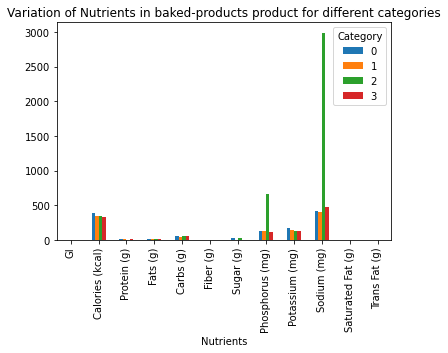

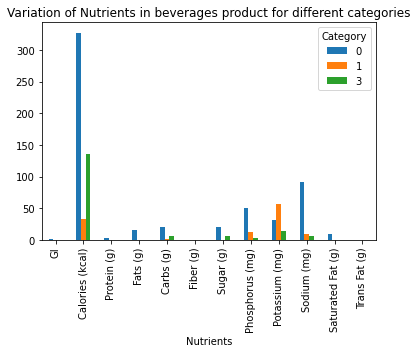

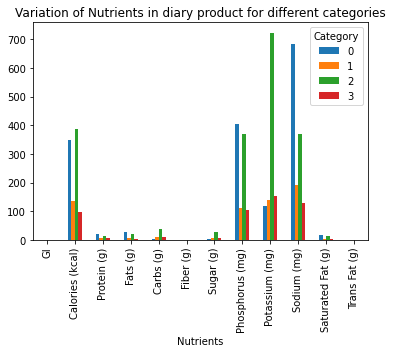

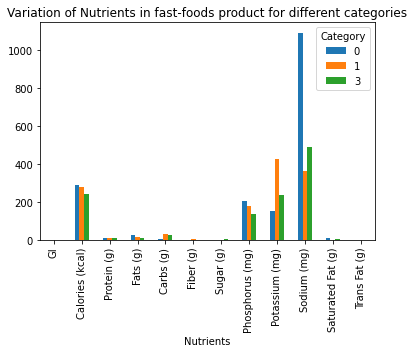

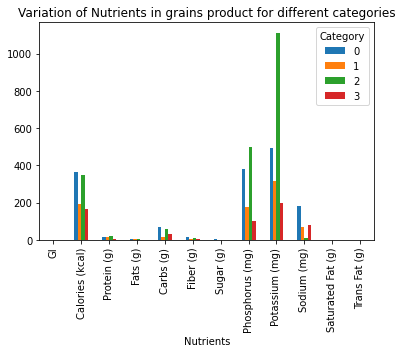

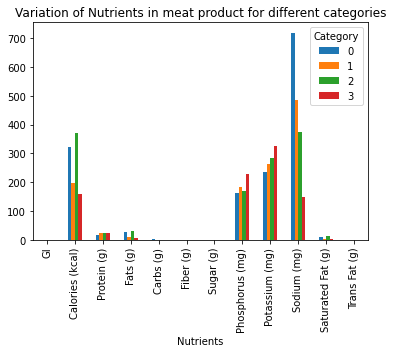

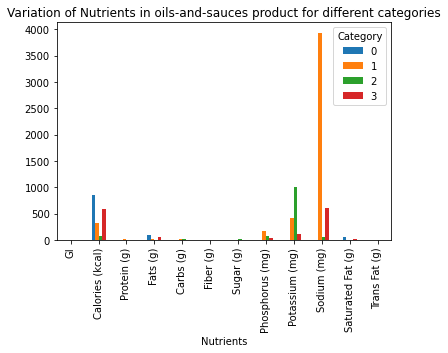

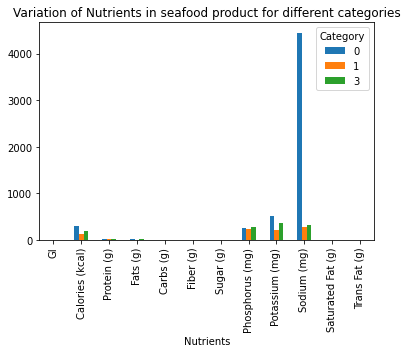

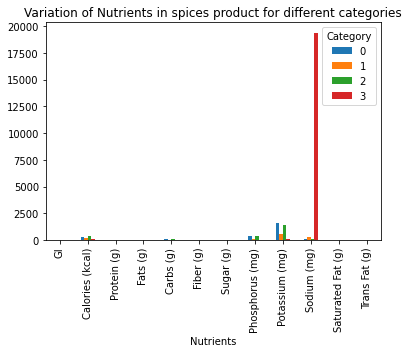

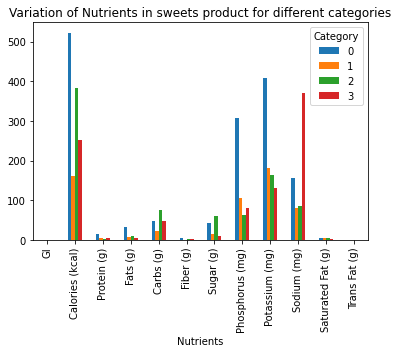

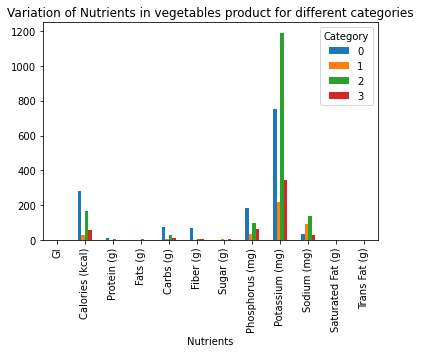

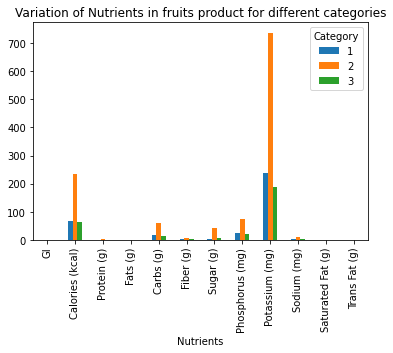

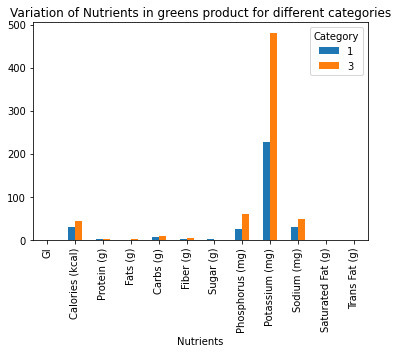

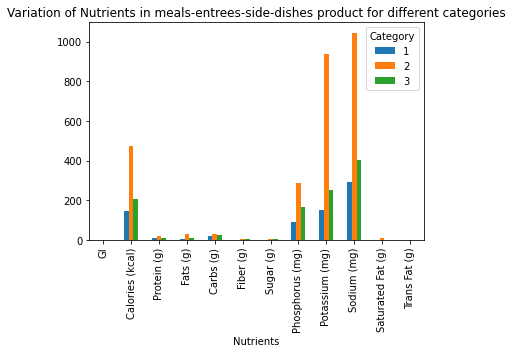

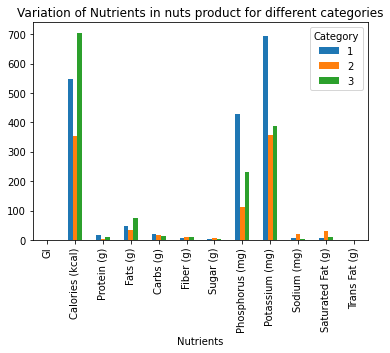

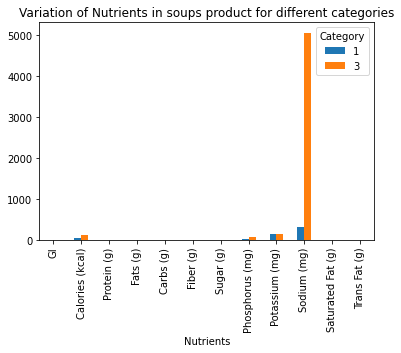

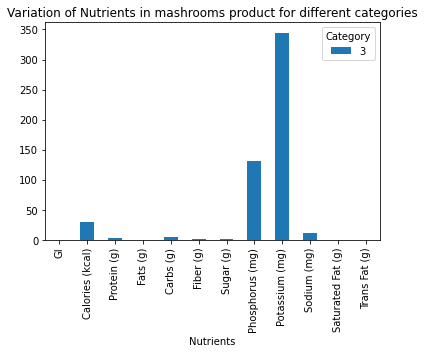

In [11]:
for index,group in enumerate(df_std["Group"].unique()):
  sub_category = df_std[df_std["Group"]==group]
  sub_category.groupby("Category").mean().T.plot(kind="bar")
  plt.title(f"Variation of Nutrients in {group} product for different categories")
  plt.xlabel("Nutrients")